# 2022-3-14
# 本代码根据吴老师的要求对2m环流场图进行修改

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib as mpl

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

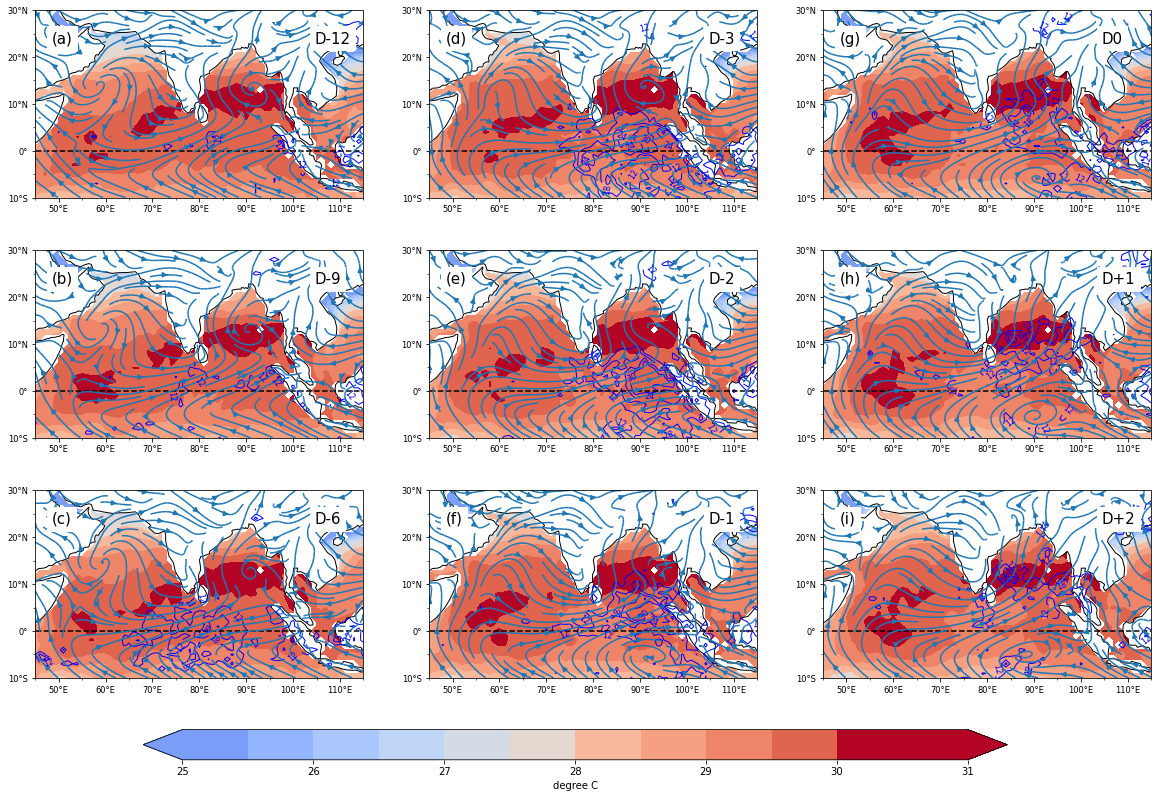

In [2]:
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

dates  =  [-12,-9,-6,-3,-2,-1,0,1,2] #总共9张图
date   =  [18,21,24,27,28,29,30,31,32]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

path  =  "/home/sun/qomo-data/"
f1 =  xr.open_dataset(path+"composite_OISST_trans.nc").sel(lon=lon_slice,lat=lat_slice)
f2 =  xr.open_dataset(path+"composite-precipitation_trmm.nc")
f3 =  xr.open_dataset(path+"composite-merra2-single.nc").sel(lon=lon_slice,lat=lat_slice)

new_lon  =  f1.lon.data
new_lat  =  np.linspace(-50,50,101)

in_prect_1  =  np.zeros((f2.time.shape[0],f2.lat.shape[0],new_lon.shape[0]))
in_prect_2  =  np.zeros((f2.time.shape[0],new_lat.shape[0],new_lon.shape[0]))          

old_prect  =  f2.precipitation.data.swapaxes(2,1) 

for tt in range(f2.time.shape[0]):
    for yy in range(f2.lat.shape[0]):
        in_prect_1[tt,yy,:]  =  np.interp(new_lon,f2.lon.data,old_prect[tt,yy,:])
        
for tt in range(f2.time.shape[0]):
    for xx in range(new_lon.shape[0]):
        in_prect_2[tt,:,xx]  =  np.interp(new_lat,f2.lat.data,in_prect_1[tt,:,xx])



proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=3)

viridis = cm.get_cmap('coolwarm', 16)
newcolors = viridis(np.linspace(0.2, 1, 15))
newcmp = ListedColormap(newcolors)
#newcmp.set_under('blue')
#newcmp.set_over('red')

j = 0
    
for col in range(3):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contour(new_lon,new_lat,in_prect_2[date[j],:],levels=np.arange(12,35,6),colors='b',linewidths=1,alpha=1,zorder=1)
            ax.clabel(im, inline=True, fontsize=8)
            im2 =  ax.contourf(f1.lon,f1.lat,f1.sst[date[j],:],levels=np.linspace(25,31,13),cmap=newcmp,extend='both',zorder=0)
            #q  =  ax.streamplot(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:], 
            #                regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
            #                scale_units='xy', scale=1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
            #                units='xy', width=0.25,
            #                transform=proj,
            #                color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5,zorder=1.1)
            q   =   ax.streamplot(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:])
            if dates[j]<0:
                ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            elif dates[j]>0:
                 ax.text(0.85,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            else:
                 ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)

        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im2, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='degree C')

!mkdir -p /home/sun/paint/lunwen/version2.0
plt.savefig("/home/sun/paint/lunwen/version2.0/fig3_version2.0_2mwind_prect_trmm_oisst.pdf", bbox_inches='tight', dpi=1200)
plt.show()

## 尝试变宽度的

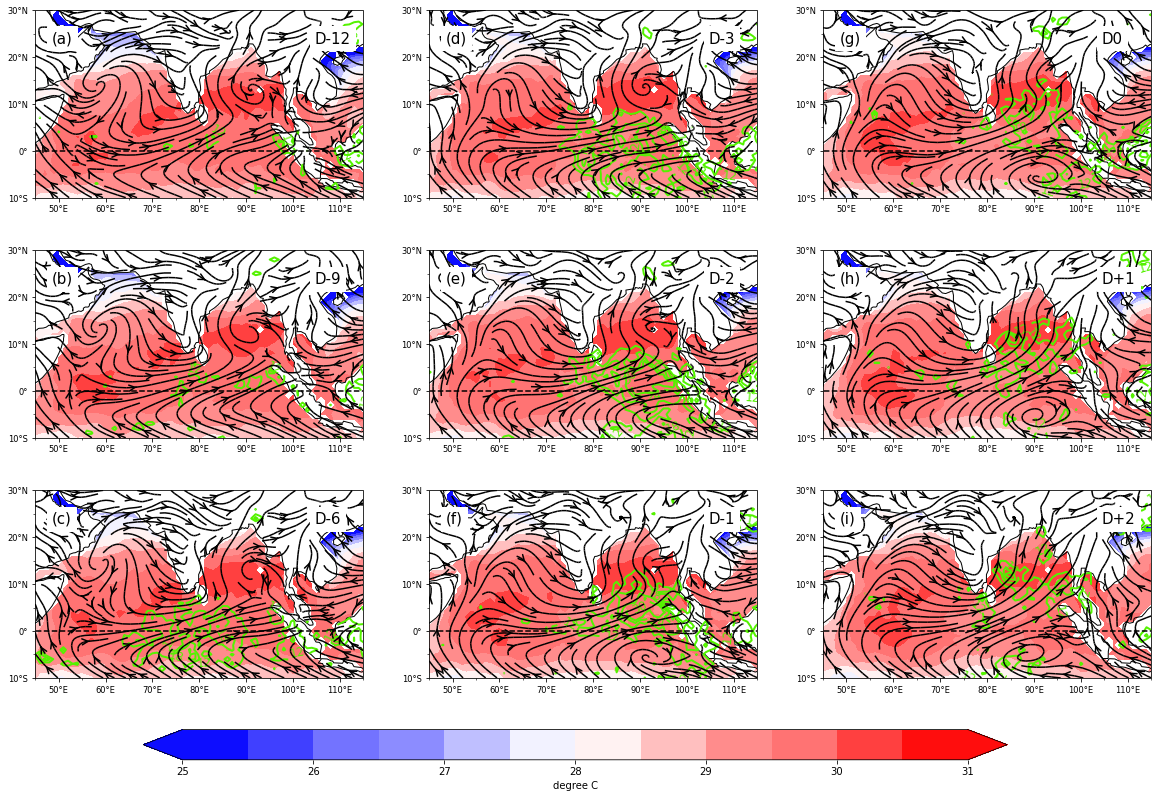

In [7]:
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

dates  =  [-12,-9,-6,-3,-2,-1,0,1,2] #总共9张图
date   =  [18,21,24,27,28,29,30,31,32]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

path  =  "/home/sun/qomo-data/"
f1 =  xr.open_dataset(path+"composite_OISST_trans.nc").sel(lon=lon_slice,lat=lat_slice)
f2 =  xr.open_dataset(path+"composite-precipitation_trmm.nc")
f3 =  xr.open_dataset(path+"composite-merra2-single.nc").sel(lon=lon_slice,lat=lat_slice)

new_lon  =  f1.lon.data
new_lat  =  np.linspace(-50,50,101)

in_prect_1  =  np.zeros((f2.time.shape[0],f2.lat.shape[0],new_lon.shape[0]))
in_prect_2  =  np.zeros((f2.time.shape[0],new_lat.shape[0],new_lon.shape[0]))          

old_prect  =  f2.precipitation.data.swapaxes(2,1) 

for tt in range(f2.time.shape[0]):
    for yy in range(f2.lat.shape[0]):
        in_prect_1[tt,yy,:]  =  np.interp(new_lon,f2.lon.data,old_prect[tt,yy,:])
        
for tt in range(f2.time.shape[0]):
    for xx in range(new_lon.shape[0]):
        in_prect_2[tt,:,xx]  =  np.interp(new_lat,f2.lat.data,in_prect_1[tt,:,xx])



proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=3)

viridis = cm.get_cmap('coolwarm', 16)
newcolors = viridis(np.linspace(0.2, 1, 15))
newcmp = ListedColormap(newcolors)
#newcmp.set_under('blue')
#newcmp.set_over('red')

j = 0

    
for col in range(3):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contour(new_lon,new_lat,in_prect_2[date[j],:],levels=np.arange(12,35,6),colors='#54f200',linewidths=2,alpha=1,zorder=1)
            ax.clabel(im, inline=True, fontsize=12,  use_clabeltext=True, colors='#54f200')
            im2 =  ax.contourf(f1.lon,f1.lat,f1.sst[date[j],:],levels=np.linspace(25,31,13),cmap=cmap,extend='both',zorder=0)
            #q  =  ax.streamplot(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:], 
            #                regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
            #                scale_units='xy', scale=1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
            #                units='xy', width=0.25,
            #                transform=proj,
            #                color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5,zorder=1.1)
            #speed  =  np.sqrt(f3.U2M.data[date[j],:]**2 + f3.V2M.data[date[j],:]**2)
            #lw  =   2.8*speed / speed.max()
            q   =   ax.streamplot(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:], linewidth = 1.5, color = 'k',density=[1, 1.15], arrowsize=1.5, arrowstyle='->',zorder=5)
            if dates[j]<0:
                ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15,zorder=10)
            elif dates[j]>0:
                 ax.text(0.85,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15,zorder=10)
            else:
                 ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15,zorder=10)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15,zorder=10)

        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im2, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='degree C')

!mkdir -p /home/sun/paint/lunwen/version2.0
plt.savefig("/home/sun/paint/lunwen/version2.0/fig3_version2.0_2mwind_prect_trmm_oisst.pdf", bbox_inches='tight', dpi=1200)
plt.show()

## 测试从ncl扒下来的colormap

In [ ]:
import cv2 as cv
import numpy as np

rgb  =  []
with open("/home/sun/data/color_rgb/GMT_polar.txt","r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        line1  =  line.split()
        rgb.append(tuple(np.array(line.split()).astype(float)))
        
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('newcmp', rgb, N=10)

In [ ]:
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

dates  =  [-12,-9,-6,-3,-2,-1,0,1,2] #总共9张图
date   =  [18,21,24,27,28,29,30,31,32]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

path  =  "/home/sun/qomo-data/"
f1 =  xr.open_dataset(path+"composite_OISST_trans.nc").sel(lon=lon_slice,lat=lat_slice)
f2 =  xr.open_dataset(path+"composite-precipitation_trmm.nc")
f3 =  xr.open_dataset(path+"composite-merra2-single.nc").sel(lon=lon_slice,lat=lat_slice)

new_lon  =  f1.lon.data
new_lat  =  np.linspace(-50,50,101)

in_prect_1  =  np.zeros((f2.time.shape[0],f2.lat.shape[0],new_lon.shape[0]))
in_prect_2  =  np.zeros((f2.time.shape[0],new_lat.shape[0],new_lon.shape[0]))          

old_prect  =  f2.precipitation.data.swapaxes(2,1) 

for tt in range(f2.time.shape[0]):
    for yy in range(f2.lat.shape[0]):
        in_prect_1[tt,yy,:]  =  np.interp(new_lon,f2.lon.data,old_prect[tt,yy,:])
        
for tt in range(f2.time.shape[0]):
    for xx in range(new_lon.shape[0]):
        in_prect_2[tt,:,xx]  =  np.interp(new_lat,f2.lat.data,in_prect_1[tt,:,xx])



proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=3)

viridis = cm.get_cmap('coolwarm', 16)
newcolors = viridis(np.linspace(0.2, 1, 15))
newcmp = ListedColormap(newcolors)
#newcmp.set_under('blue')
#newcmp.set_over('red')

j = 0
    
for col in range(3):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contour(new_lon,new_lat,in_prect_2[date[j],:],levels=np.arange(12,35,6),colors='b',linewidths=1,alpha=1,zorder=1)
            ax.clabel(im, inline=True, fontsize=8)
            im2 =  ax.contourf(f1.lon,f1.lat,f1.sst[date[j],:],levels=np.linspace(25,31,13),cmap=cmap,extend='both',zorder=0)
            #q  =  ax.streamplot(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:], 
            #                regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
            #                scale_units='xy', scale=1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
            #                units='xy', width=0.25,
            #                transform=proj,
            #                color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5,zorder=1.1)
            q   =   ax.streamplot(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:])
            if dates[j]<0:
                ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            elif dates[j]>0:
                 ax.text(0.85,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            else:
                 ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)

        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im2, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='degree C')

!mkdir -p /home/sun/paint/lunwen/version2.0
plt.savefig("/home/sun/paint/lunwen/version2.0/fig3_version2.0_2mwind_prect_trmm_oisst.pdf", bbox_inches='tight', dpi=1200)
plt.show()

## 测试


In [4]:
cmap  =  create_ncl_colormap("/home/sun/data/color_rgb/GMT_polar.txt",20)

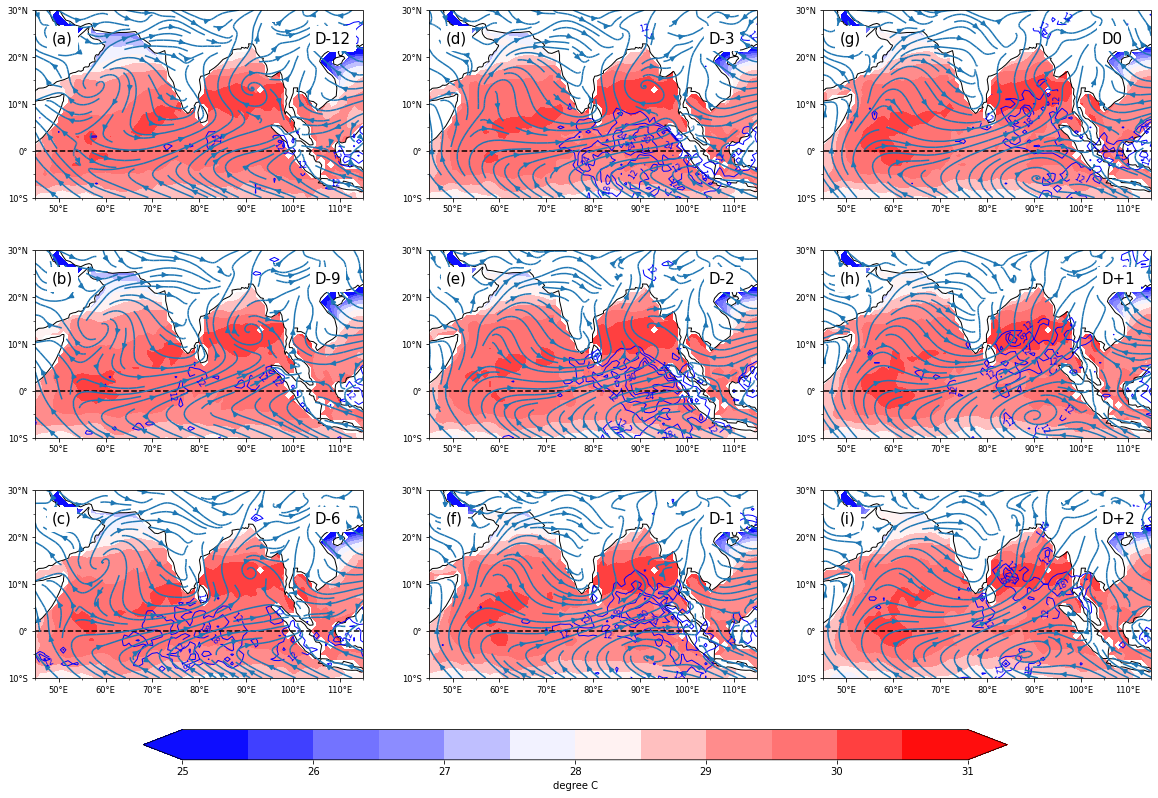

In [5]:
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

dates  =  [-12,-9,-6,-3,-2,-1,0,1,2] #总共9张图
date   =  [18,21,24,27,28,29,30,31,32]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

path  =  "/home/sun/qomo-data/"
f1 =  xr.open_dataset(path+"composite_OISST_trans.nc").sel(lon=lon_slice,lat=lat_slice)
f2 =  xr.open_dataset(path+"composite-precipitation_trmm.nc")
f3 =  xr.open_dataset(path+"composite-merra2-single.nc").sel(lon=lon_slice,lat=lat_slice)

new_lon  =  f1.lon.data
new_lat  =  np.linspace(-50,50,101)

in_prect_1  =  np.zeros((f2.time.shape[0],f2.lat.shape[0],new_lon.shape[0]))
in_prect_2  =  np.zeros((f2.time.shape[0],new_lat.shape[0],new_lon.shape[0]))          

old_prect  =  f2.precipitation.data.swapaxes(2,1) 

for tt in range(f2.time.shape[0]):
    for yy in range(f2.lat.shape[0]):
        in_prect_1[tt,yy,:]  =  np.interp(new_lon,f2.lon.data,old_prect[tt,yy,:])
        
for tt in range(f2.time.shape[0]):
    for xx in range(new_lon.shape[0]):
        in_prect_2[tt,:,xx]  =  np.interp(new_lat,f2.lat.data,in_prect_1[tt,:,xx])



proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=3)

viridis = cm.get_cmap('coolwarm', 16)
newcolors = viridis(np.linspace(0.2, 1, 15))
newcmp = ListedColormap(newcolors)
#newcmp.set_under('blue')
#newcmp.set_over('red')

j = 0
    
for col in range(3):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contour(new_lon,new_lat,in_prect_2[date[j],:],levels=np.arange(12,35,6),colors='b',linewidths=1,alpha=1,zorder=1)
            ax.clabel(im, inline=True, fontsize=8)
            im2 =  ax.contourf(f1.lon,f1.lat,f1.sst[date[j],:],levels=np.linspace(25,31,13),cmap=cmap,extend='both',zorder=0)
            #q  =  ax.streamplot(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:], 
            #                regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
            #                scale_units='xy', scale=1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
            #                units='xy', width=0.25,
            #                transform=proj,
            #                color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5,zorder=1.1)
            q   =   ax.streamplot(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:])
            if dates[j]<0:
                ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            elif dates[j]>0:
                 ax.text(0.85,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            else:
                 ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)

        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im2, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='degree C')

!mkdir -p /home/sun/paint/lunwen/version2.0
plt.savefig("/home/sun/paint/lunwen/version2.0/fig3_version2.0_2mwind_prect_trmm_oisst.pdf", bbox_inches='tight', dpi=1200)
plt.show()